In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wolfeehardd","key":"3b6bde1625e3a85f2697957907a81ca6"}'}

In [2]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)

# Move kaggle.json into it
!mv kaggle.json /root/.kaggle/

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0


In [4]:
import zipfile
!unzip us-accidents.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_March23.csv  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df = pd.read_csv("/content/US_Accidents_March23.csv")

In [146]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [147]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [148]:
df.isnull().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,3402762
End_Lng,3402762
Distance(mi),0


In [149]:
df.shape

(7728394, 46)

In [150]:
columns_to_drop = [
    'End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)',
]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [151]:
# Fill temperature-related columns
df['Temperature(F)'].fillna(df['Temperature(F)'].mean(), inplace=True)
df['Humidity(%)'].fillna(df['Humidity(%)'].mean(), inplace=True)
df['Pressure(in)'].fillna(df['Pressure(in)'].mean(), inplace=True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean(), inplace=True)
df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].median(), inplace=True)

# Fill categorical columns
cat_cols = ['Weather_Condition', 'Wind_Direction', 'Sunrise_Sunset',
            'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
            'Timezone']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Zipcode (not essential unless you need location granularity)
df['Zipcode'].fillna("Unknown", inplace=True)

# Description (very few nulls)
df['Description'].fillna("No description", inplace=True)

<ipython-input-151-f52afbd4ea38>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature(F)'].fillna(df['Temperature(F)'].mean(), inplace=True)
<ipython-input-151-f52afbd4ea38>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [152]:
df['Street'].fillna("Unknown Street", inplace=True)
df['City'].fillna("Unknown", inplace=True)

# Optional handling of Airport_Code
df['Airport_Code'].fillna("Unknown", inplace=True)

# For Weather_Timestamp (not critical unless you're using time-series)
df['Weather_Timestamp'].fillna(method='ffill', inplace=True)

<ipython-input-152-1ffb91f8e53c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Street'].fillna("Unknown Street", inplace=True)
<ipython-input-152-1ffb91f8e53c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [153]:
# Convert all boolean columns (True/False) to 1 and 0
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

<ipython-input-153-74a2b6ae7208>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [154]:
# Convert 'Night' -> 0 and 'Day' -> 1 in the 'Sunrise_Sunset' column
df = df.applymap(lambda x: 1 if x == 'Day' else (0 if x == 'Night' else x))

<ipython-input-154-2a73bf2d35c6>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x == 'Day' else (0 if x == 'Night' else x))


In [155]:
df["Start_Time"]

,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07
...,...
7728389,2019-08-23 18:03:25
7728390,2019-08-23 19:11:30
7728391,2019-08-23 19:00:21
7728392,2019-08-23 19:00:21


In [156]:
df['Start_Time'] = df['Start_Time'].str.split('.').str[0]

# Now convert the cleaned column to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [157]:
# Convert 'Start_Time' to datetime, handle invalid entries as NaT
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

In [158]:
df['Start_Time'].head()

,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07


In [159]:
# Extract hour, day of the week, and month from 'Start_Time'
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year

In [160]:
df[['Start_Time', 'Hour', 'Day_of_Week', 'Month', 'Year']].head()

,Start_Time,Hour,Day_of_Week,Month,Year
0,2016-02-08 05:46:00,5,0,2,2016
1,2016-02-08 06:07:59,6,0,2,2016
2,2016-02-08 06:49:27,6,0,2,2016
3,2016-02-08 07:23:34,7,0,2,2016
4,2016-02-08 07:39:07,7,0,2,2016


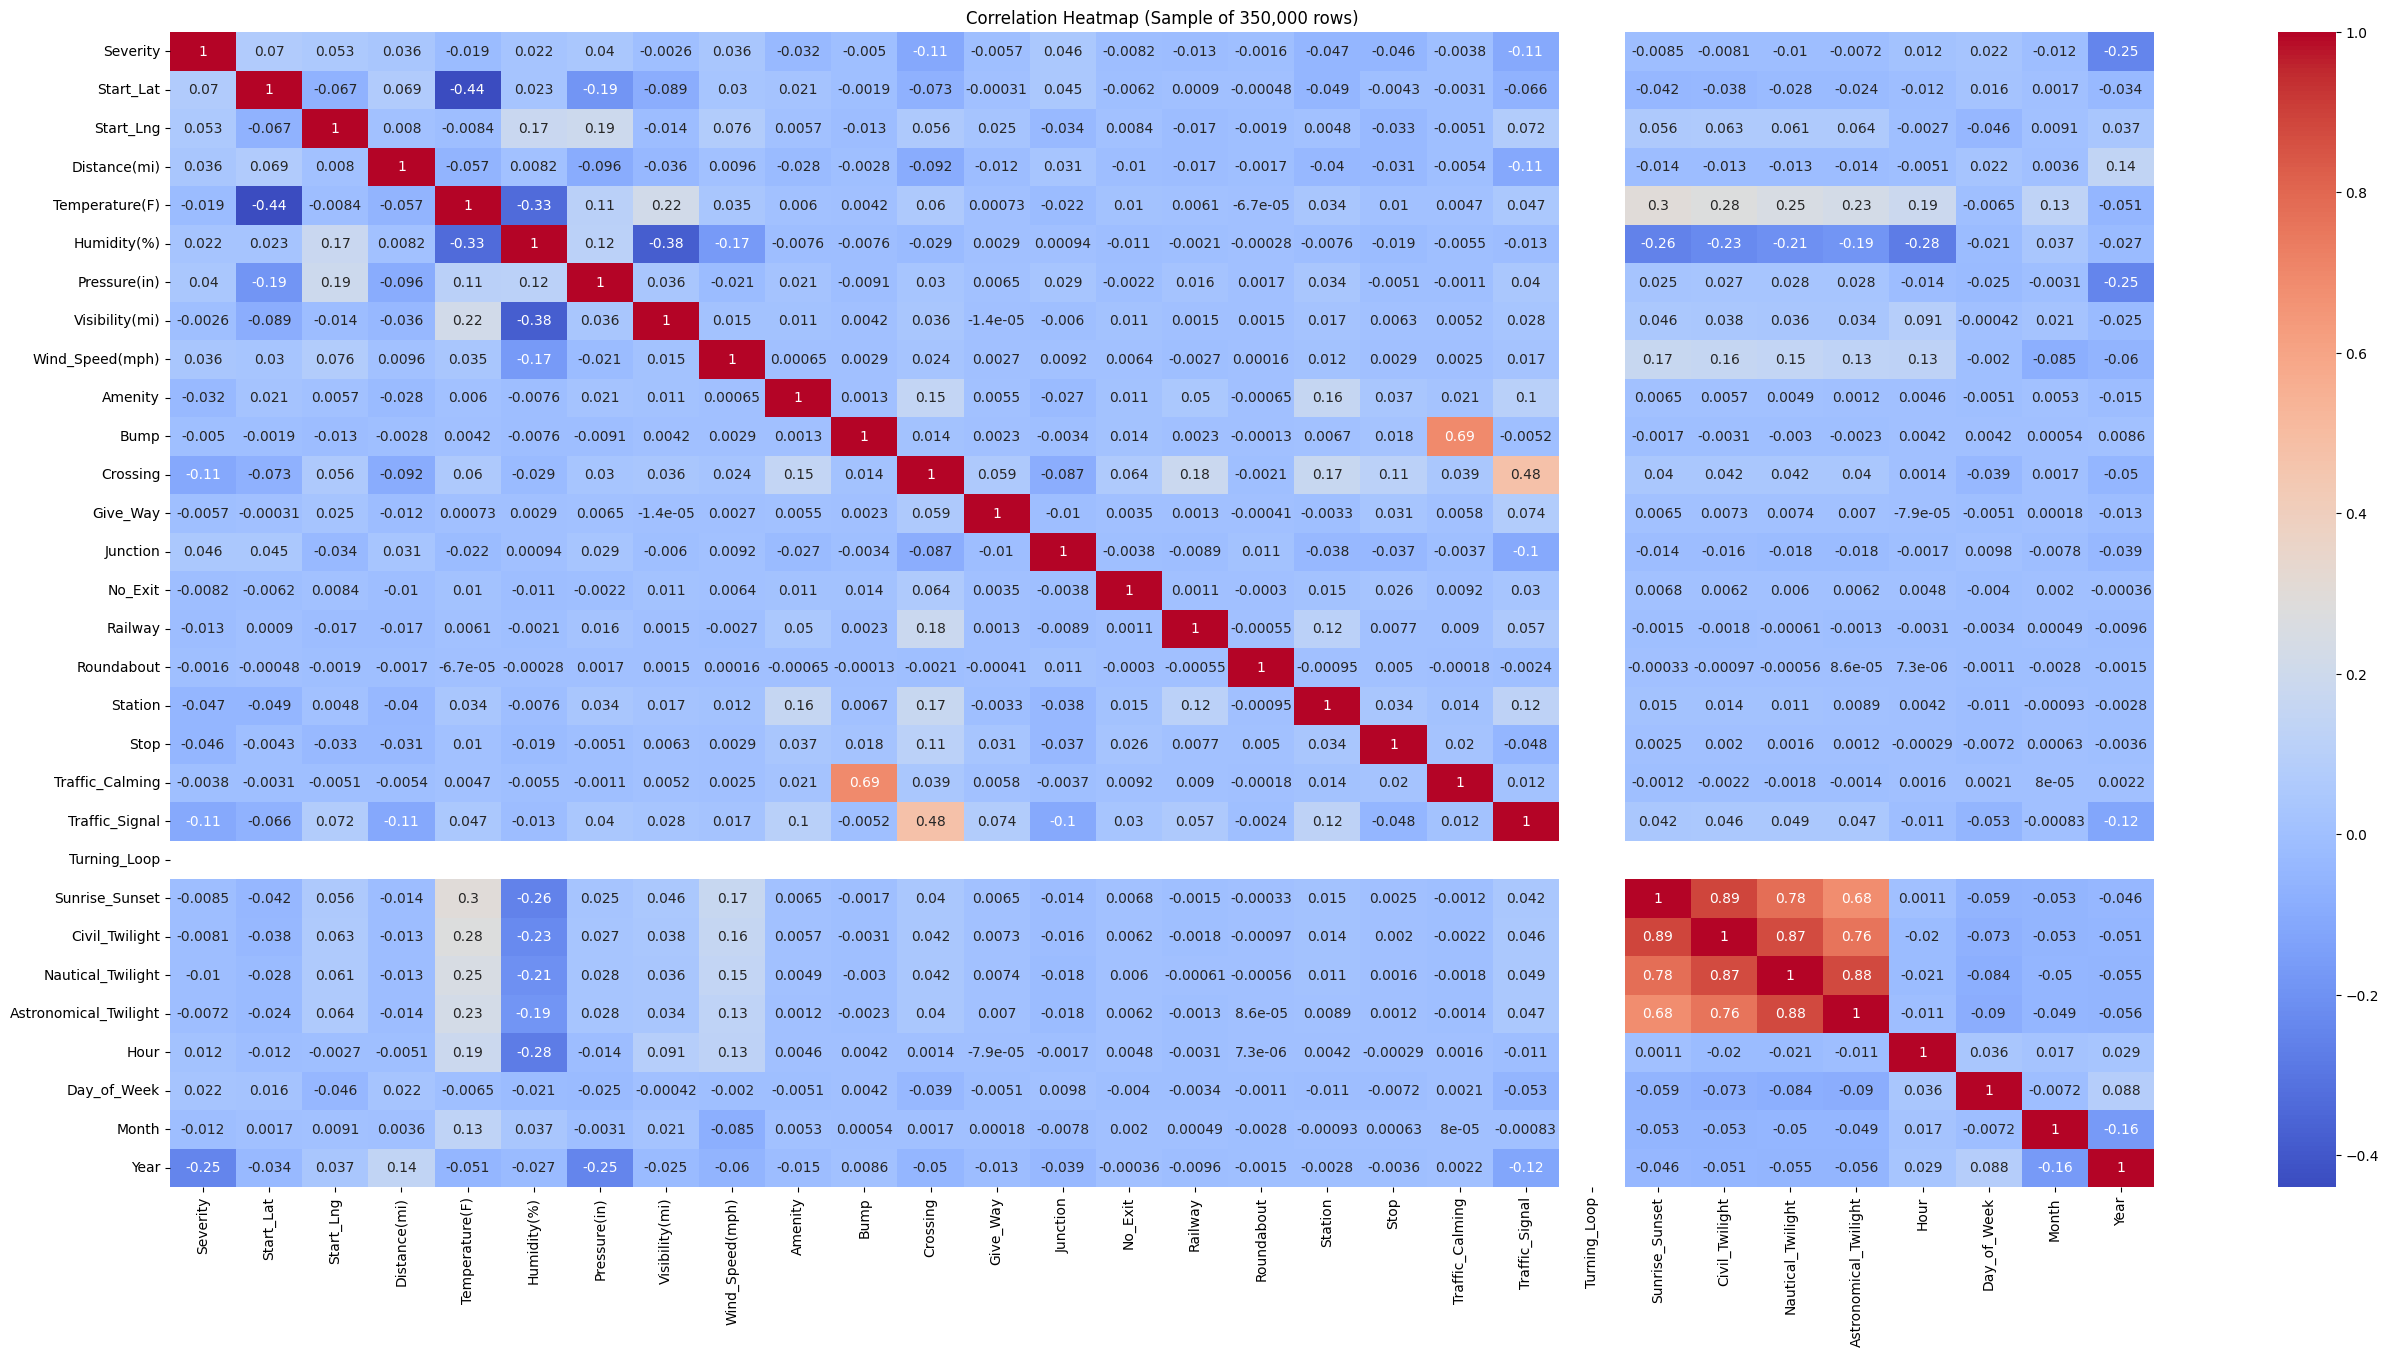

In [161]:
# Limit the dataset to 350,000 rows for performance
sample_df = df.sample(n=350000, random_state=42)

# Plot correlation heatmap on the sample
plt.figure(figsize=(32, 15))
sns.heatmap(sample_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Sample of 350,000 rows)')
plt.show()

<Axes: xlabel='Severity', ylabel='Visibility(mi)'>

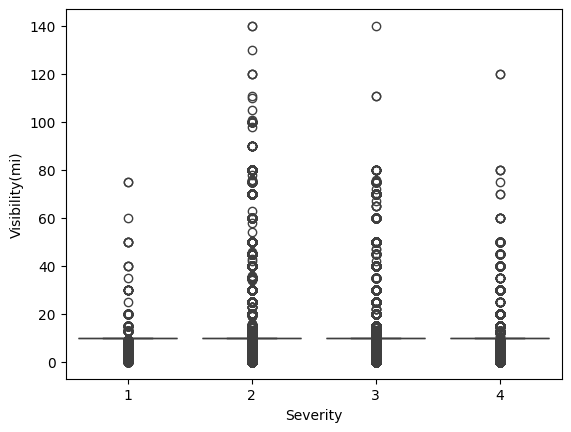

In [191]:
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)

In [162]:
# Count the number of accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()

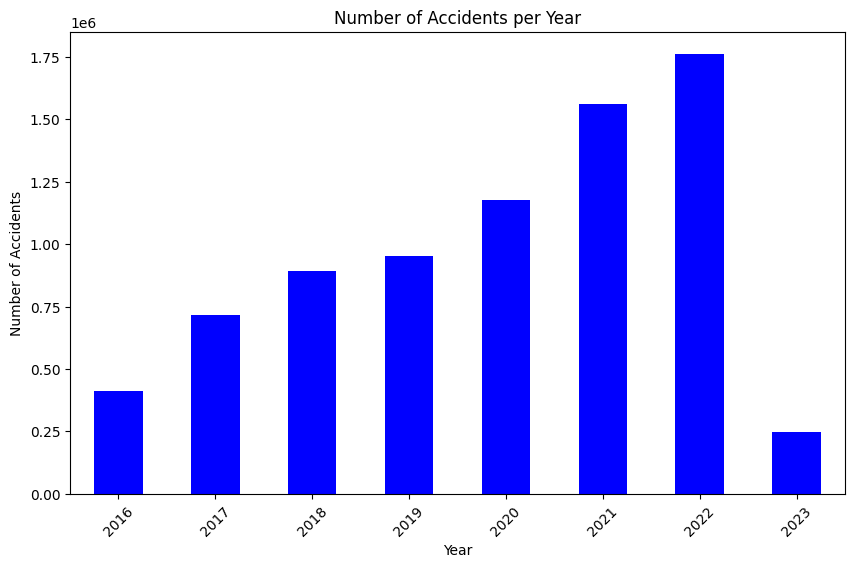

In [163]:
accidents_per_year.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [164]:
# Count the number of accidents per state
accidents_per_state = df['State'].value_counts()

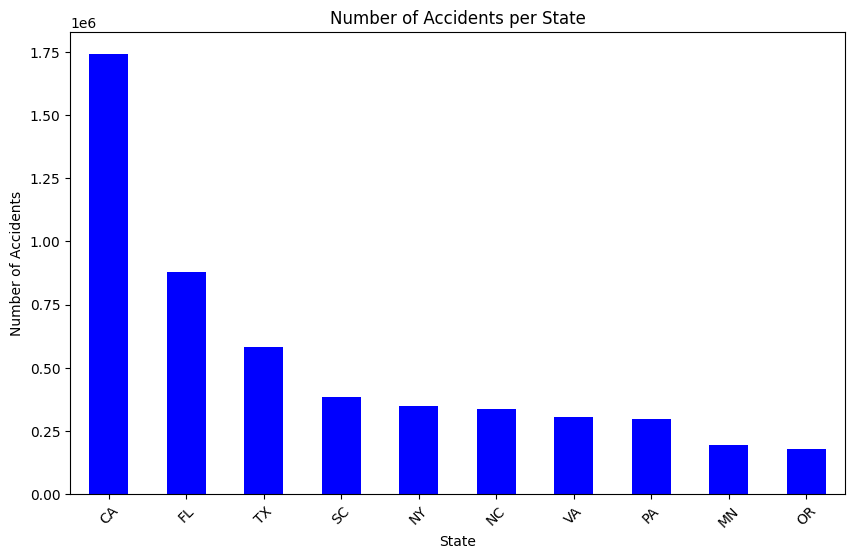

In [165]:
# Plot top 10 states with the most accidents (optional for better visualization)
top_10_states = accidents_per_state.head(10)

top_10_states.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Number of Accidents per State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [166]:
# Count the number of accidents per city
accidents_per_city = df['City'].value_counts()

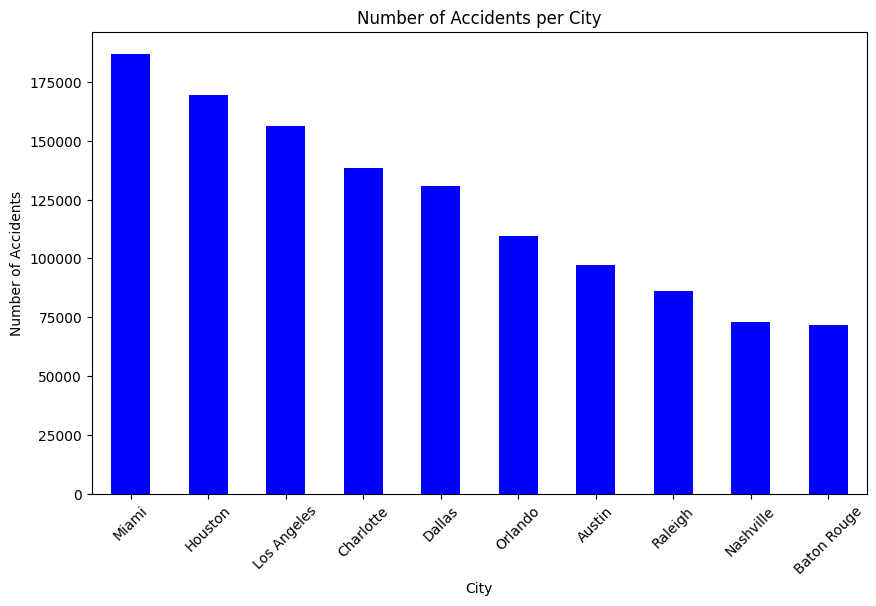

In [167]:
# Plot top 10 cities with the most accidents (optional for better visualization)
top_10_cities = accidents_per_city.head(10)

top_10_cities.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Number of Accidents per City')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [168]:
# Count accidents by State and City (Group by State, then City)
accidents_by_state_city = df.groupby(['State', 'City']).size().reset_index(name='Accidents')

# Get top 10 cities by accident count for each state
top_cities_per_state = accidents_by_state_city.groupby('State').apply(lambda x: x.nlargest(10, 'Accidents')).reset_index(drop=True)

# Display the result
print(top_cities_per_state.head())

  State        City  Accidents
0    AL  Birmingham      16935
1    AL  Montgomery      10373
2    AL  Huntsville       8094
3    AL      Mobile       6895
4    AL  Tuscaloosa       6779


<ipython-input-168-8f0f82547f0d>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_cities_per_state = accidents_by_state_city.groupby('State').apply(lambda x: x.nlargest(10, 'Accidents')).reset_index(drop=True)


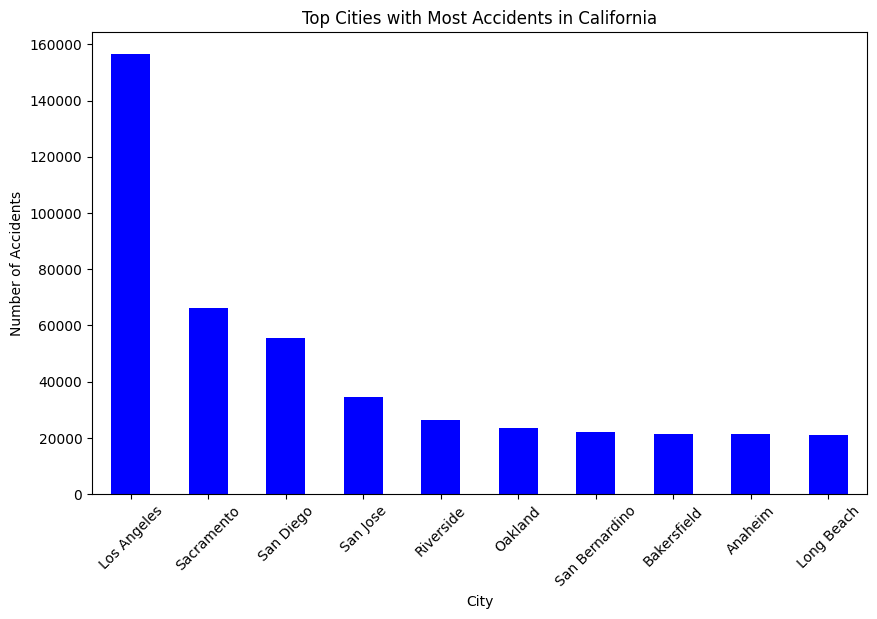

In [169]:
# Visualize a few top cities from one state
sample_state = top_cities_per_state[top_cities_per_state['State'] == 'CA']  # Example: California
sample_state.plot(kind='bar', x='City', y='Accidents', figsize=(10, 6), color='blue', legend=False)
plt.title('Top Cities with Most Accidents in California')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [170]:
# Count the number of accidents per state and year
accidents_by_state_year = df.groupby(['Year', 'State']).size().reset_index(name='Accidents')

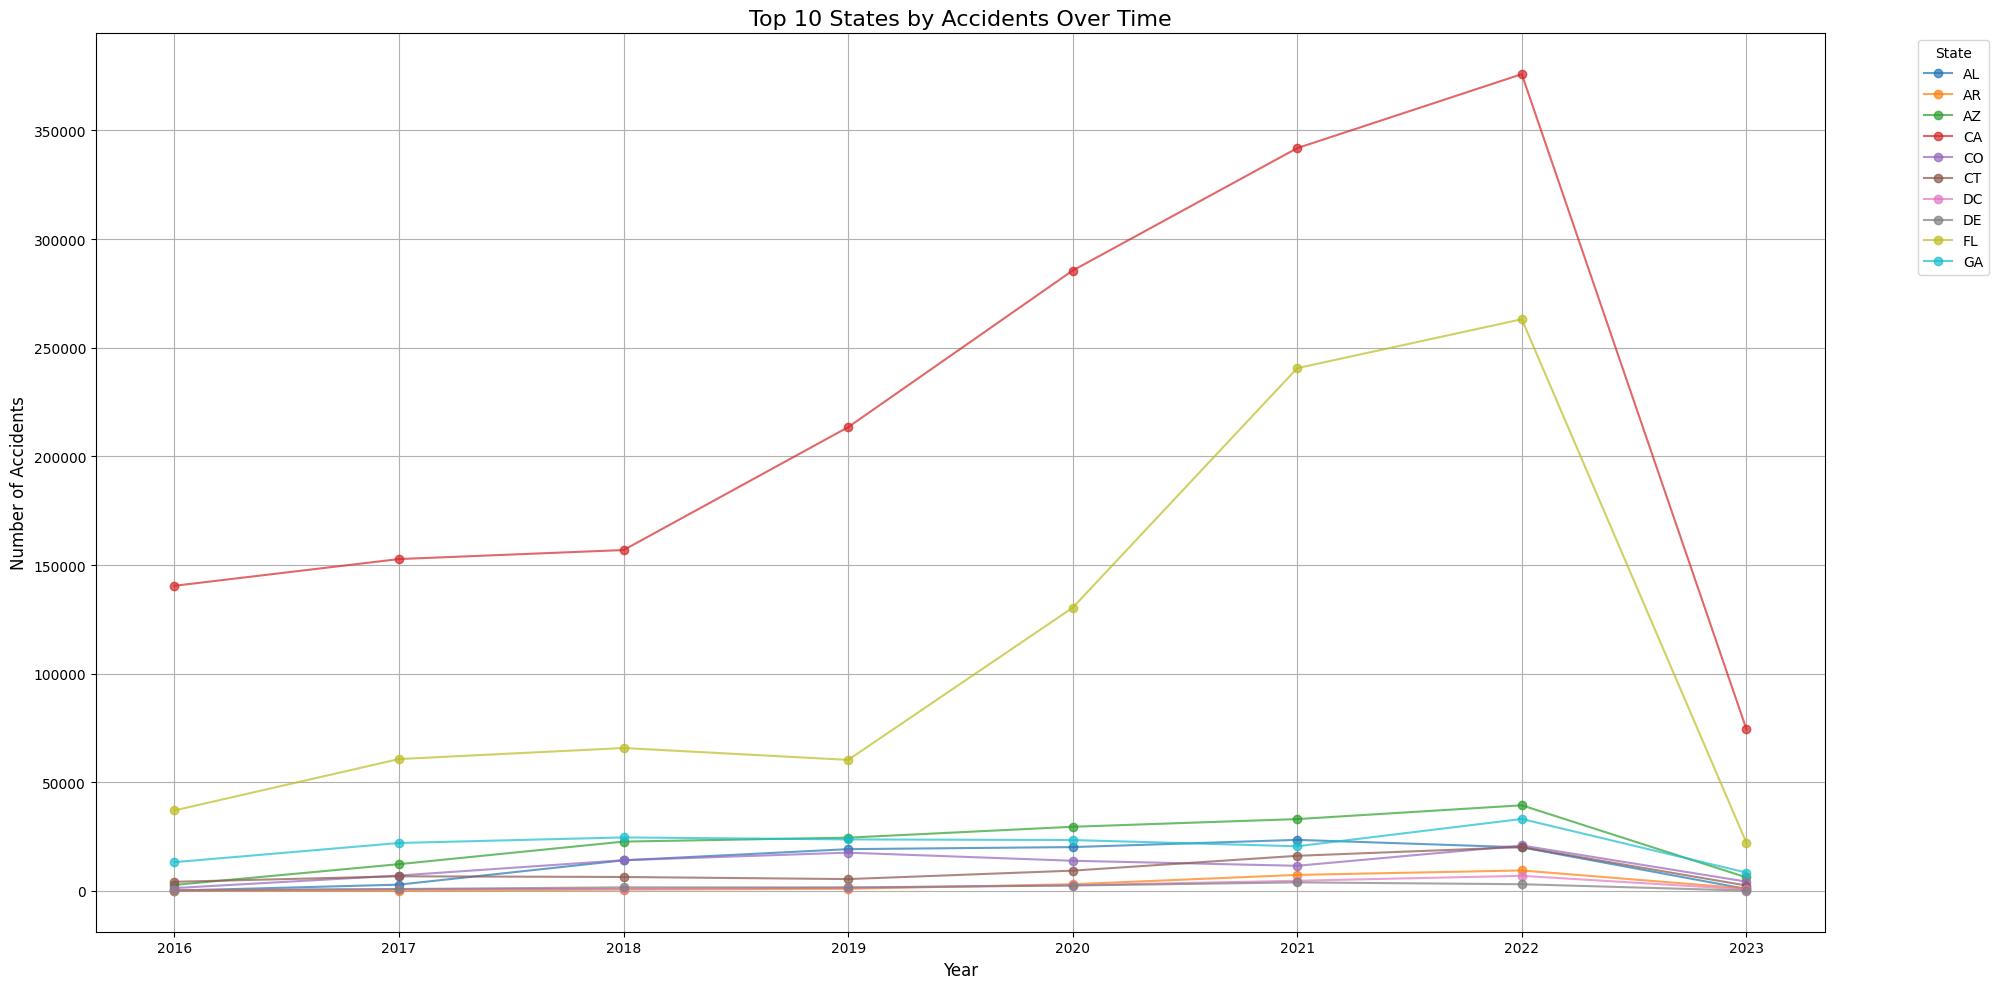

In [171]:
# Get top 10 states by accident count
top_10_states = accidents_by_state_year.groupby('State').size().nlargest(10).index

# Create a line plot for each of the top 10 states
plt.figure(figsize=(20, 10))  # Increase figure size for better readability

# Loop through the top 10 states and plot each one
for state in top_10_states:
    state_data = accidents_by_state_year[accidents_by_state_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Accidents'], label=state, marker='o', linestyle='-', alpha=0.7)

# Add labels and title
plt.title('Top 10 States by Accidents Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Adjust the legend: Move it outside the plot
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid for better readability
plt.grid(True)

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()

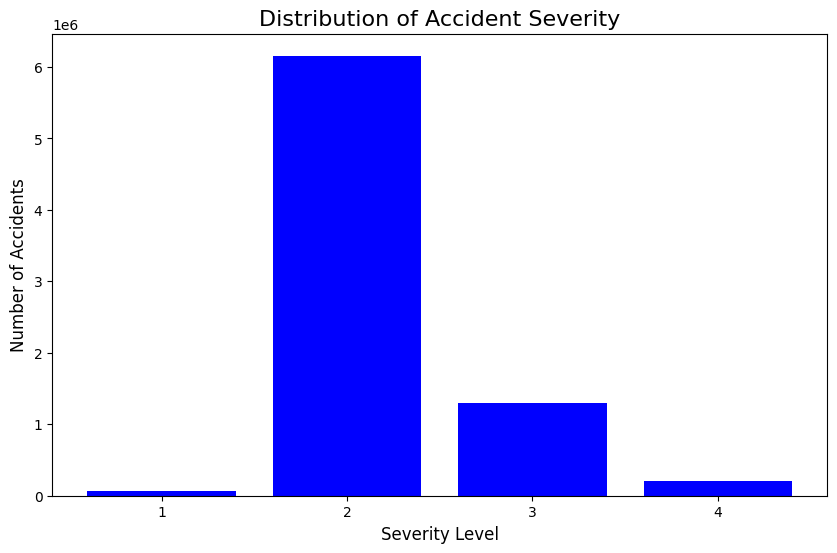

In [172]:
# Plot the distribution of accident severity
plt.figure(figsize=(10, 6))
severity_counts = df['Severity'].value_counts()  # Count of each severity level
plt.bar(severity_counts.index, severity_counts.values, color='blue')

# Add labels and title
plt.title('Distribution of Accident Severity', fontsize=16)
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(severity_counts.index)  # Make sure severity levels are labeled on x-axis

# Show the plot
plt.show()

In [173]:
# Analyze Sunrise_Sunset
sunrise_sunset_counts = df['Sunrise_Sunset'].value_counts().rename(index={1: 'Day', 0: 'Night'})
sunrise_sunset_proportions = sunrise_sunset_counts / sunrise_sunset_counts.sum()

In [174]:
# Print results
print("Accident Counts by Sunrise_Sunset:")
print(sunrise_sunset_counts)
print("\nAccident Proportions by Sunrise_Sunset:")
print(sunrise_sunset_proportions)

Accident Counts by Sunrise_Sunset:
Sunrise_Sunset
Day      5357799
Night    2370595
Name: count, dtype: int64

Accident Proportions by Sunrise_Sunset:
Sunrise_Sunset
Day      0.693262
Night    0.306738
Name: count, dtype: float64


In [175]:
# Analyze Weather_Condition
weather_counts = df['Weather_Condition'].value_counts().head(10)  # Top 10 conditions
weather_proportions = weather_counts / weather_counts.sum()

In [176]:
# Print results
print("\nAccident Counts by Weather_Condition (Top 10):")
print(weather_counts)
print("\nAccident Proportions by Weather_Condition (Top 10):")
print(weather_proportions)


Accident Counts by Weather_Condition (Top 10):
Weather_Condition
Fair                2734261
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64

Accident Proportions by Weather_Condition (Top 10):
Weather_Condition
Fair                0.377461
Mostly Cloudy       0.140284
Cloudy              0.112797
Clear               0.111646
Partly Cloudy       0.096492
Overcast            0.052854
Light Rain          0.048725
Scattered Clouds    0.028276
Light Snow          0.017764
Fog                 0.013700
Name: count, dtype: float64


In [177]:
# Cross-Analyze Sunrise_Sunset and Weather_Condition
pivot_table = df.groupby(['Sunrise_Sunset', 'Weather_Condition']).size().unstack(fill_value=0)
# Focus on top weather conditions for clarity
top_weather = weather_counts.index
pivot_table_top = pivot_table[top_weather].rename(index={1: 'Day', 0: 'Night'})

In [178]:
# Print results
print("\nAccident Counts by Sunrise_Sunset and Top Weather Conditions:")
print(pivot_table_top)


Accident Counts by Sunrise_Sunset and Top Weather Conditions:
Weather_Condition     Fair  Mostly Cloudy  Cloudy   Clear  Partly Cloudy  \
Sunrise_Sunset                                                             
Night               913501         233080  327602  236208         151014   
Day                1820760         783115  489480  572535         547958   

Weather_Condition  Overcast  Light Rain  Scattered Clouds  Light Snow    Fog  
Sunrise_Sunset                                                                
Night                123242      112979             36675       59834  47591  
Day                  259624      239978            168154       68846  51647  


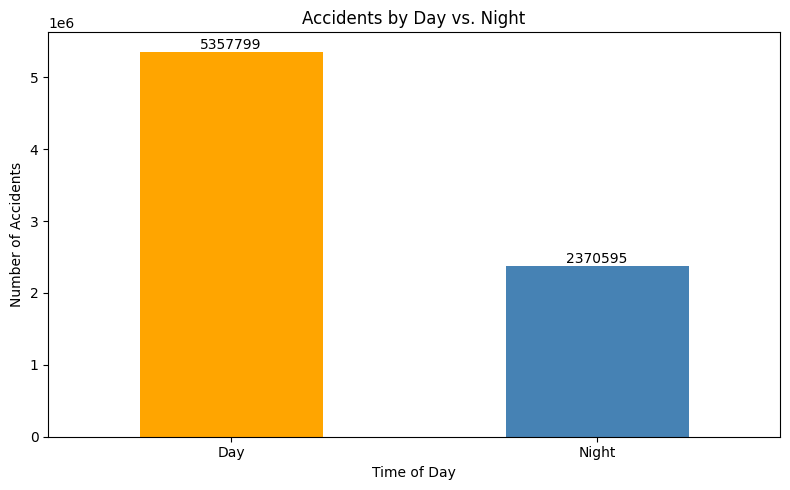

In [179]:
# Visualizations
# Set plot style


# Bar plot for Sunrise_Sunset
plt.figure(figsize=(8, 5))
sunrise_sunset_counts.plot(kind='bar', color=['#FFA500', '#4682B4'])
plt.title('Accidents by Day vs. Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
for i, v in enumerate(sunrise_sunset_counts):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

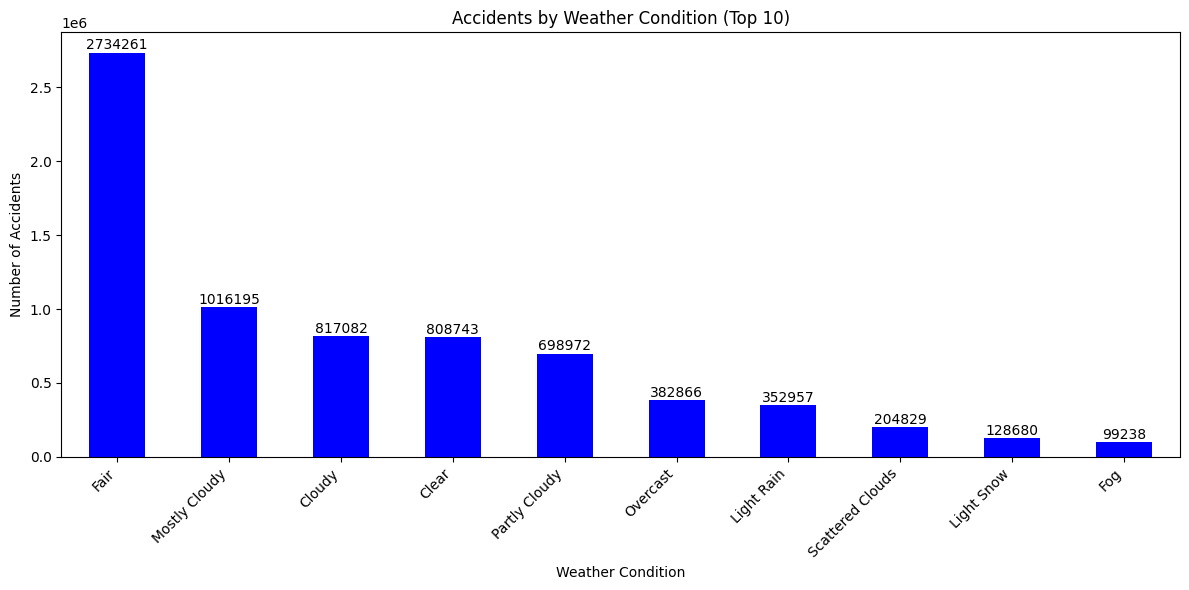

In [180]:
# Bar plot for Weather_Condition
plt.figure(figsize=(12, 6))
weather_counts.plot(kind='bar', color='blue')
plt.title('Accidents by Weather Condition (Top 10)')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(weather_counts):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

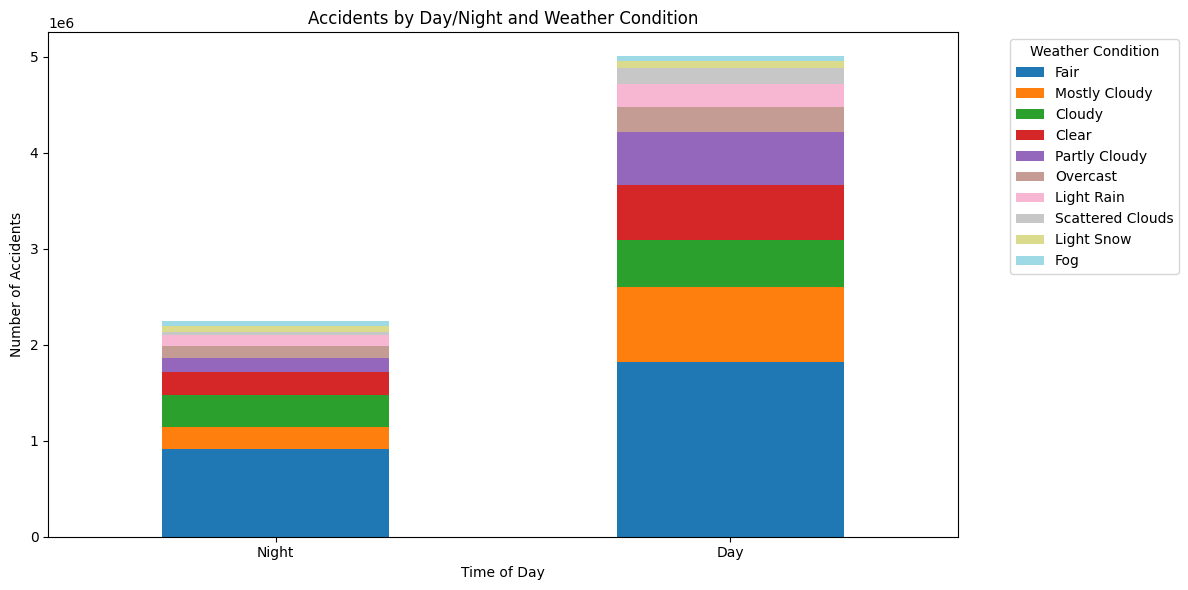

In [181]:
# Stacked bar plot for Sunrise_Sunset and Weather_Condition
pivot_table_top.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title('Accidents by Day/Night and Weather Condition')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

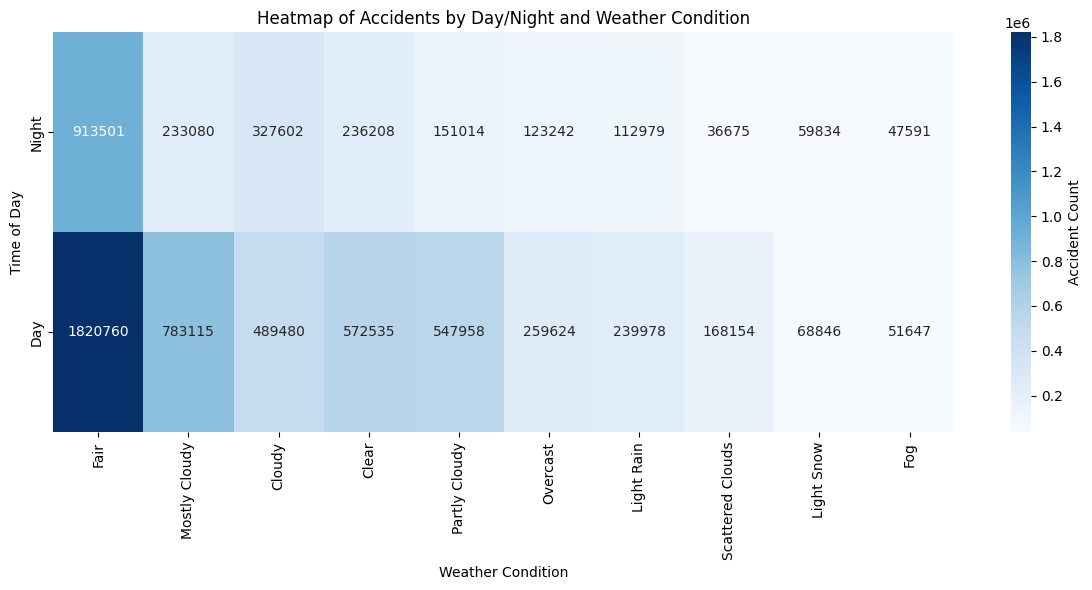

In [182]:
# Heatmap for Sunrise_Sunset and Weather_Condition
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_top, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Accident Count'})
plt.title('Heatmap of Accidents by Day/Night and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Time of Day')
plt.tight_layout()
plt.show()

In [183]:
# Severity Distribution by Sunrise_Sunset and Weather_Condition
print("Severity Distribution by Sunrise_Sunset")
severity_sunrise = df.groupby(['Sunrise_Sunset', 'Severity']).size().unstack(fill_value=0)
severity_sunrise = severity_sunrise.rename(index={1: 'Day', 0: 'Night'})
print(severity_sunrise)

Severity Distribution by Sunrise_Sunset
Severity            1        2       3       4
Sunrise_Sunset                                
Night           12248  1909821  365480   83046
Day             55118  4247160  933857  121664


<Figure size 1000x600 with 0 Axes>

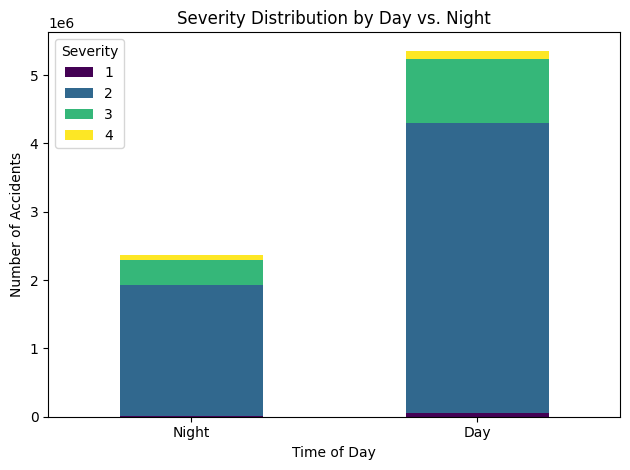

In [184]:
# Plot Severity by Sunrise_Sunset
plt.figure(figsize=(10, 6))
severity_sunrise.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Severity Distribution by Day vs. Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [185]:
# Top Weather Conditions by Severity
print("Top Weather Conditions by Severity")
top_weather = df['Weather_Condition'].value_counts().head(5).index  # Top 5 for simplicity
severity_weather = df[df['Weather_Condition'].isin(top_weather)].groupby(['Weather_Condition', 'Severity']).size().unstack(fill_value=0)
print(severity_weather)

Top Weather Conditions by Severity
Severity               1        2       3      4
Weather_Condition                               
Clear                337   536971  244956  26479
Cloudy              7985   692929   93340  22828
Fair               35313  2361357  270379  67212
Mostly Cloudy      10676   792735  189229  23555
Partly Cloudy       6820   548760  127692  15700


<Figure size 1200x600 with 0 Axes>

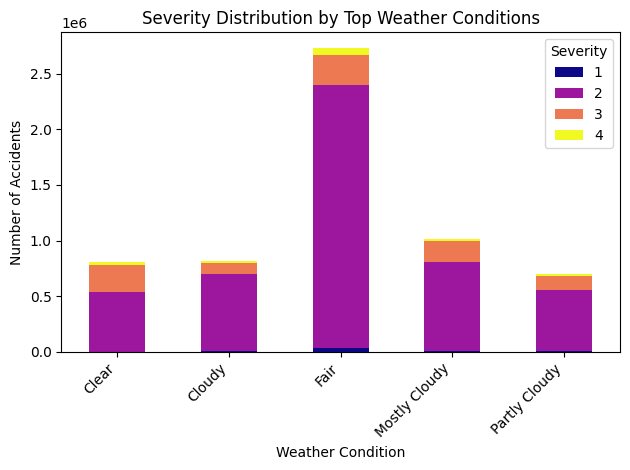

In [186]:
# Plot Severity by Weather_Condition
plt.figure(figsize=(12, 6))
severity_weather.plot(kind='bar', stacked=True, cmap='plasma')
plt.title('Severity Distribution by Top Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [187]:
# Temporal Patterns (Accidents by Hour and Day of Week)
# Ensure Start_Time is datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract hour and day of week
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.day_name()

Accidents by Hour


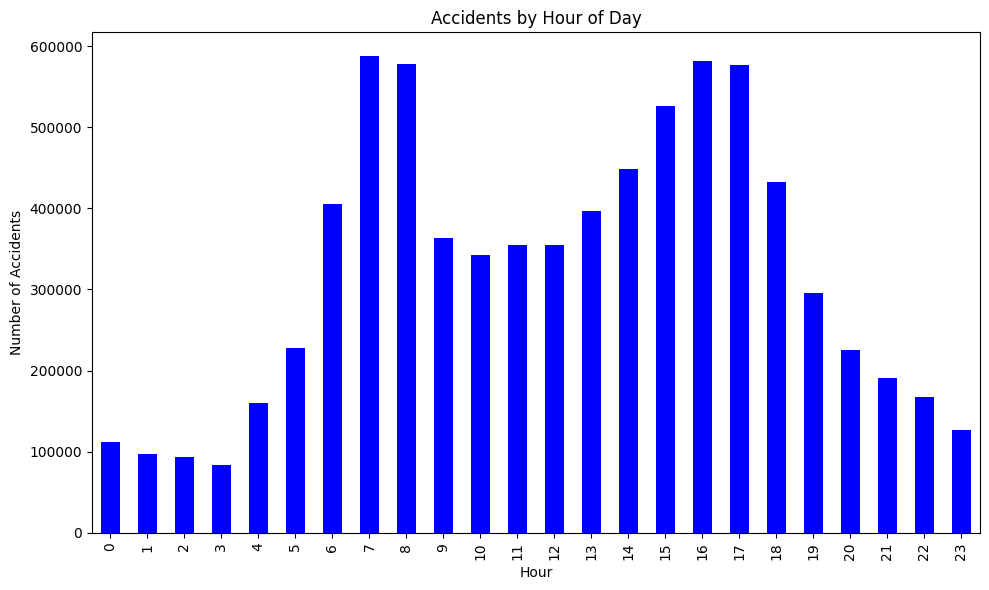

In [188]:
print("Accidents by Hour")
hourly_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='blue')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

Accidents by Day of Week


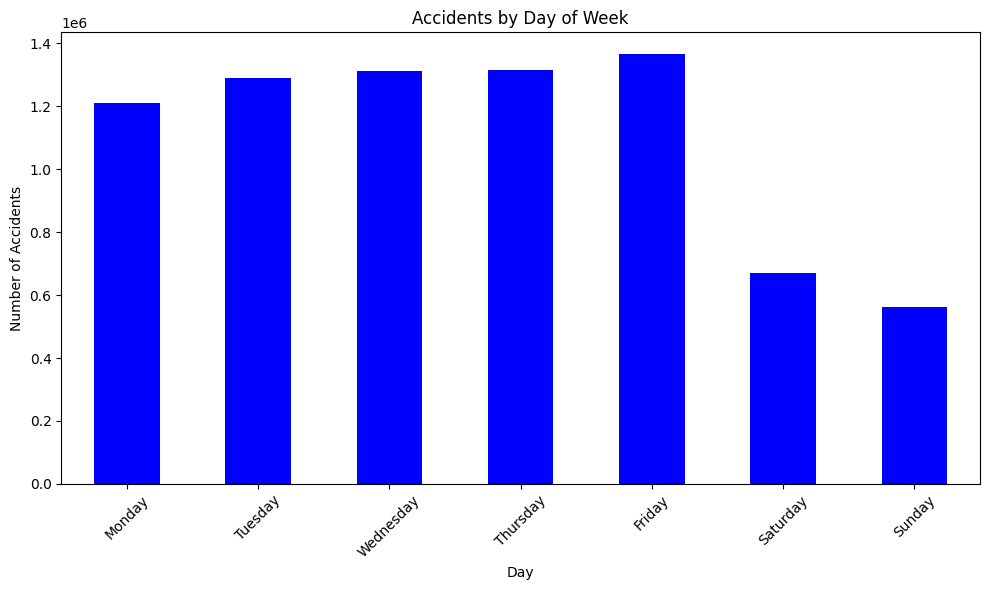

In [189]:
print("Accidents by Day of Week")
day_counts = df['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='blue')
plt.title('Accidents by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Geospatial Distribution


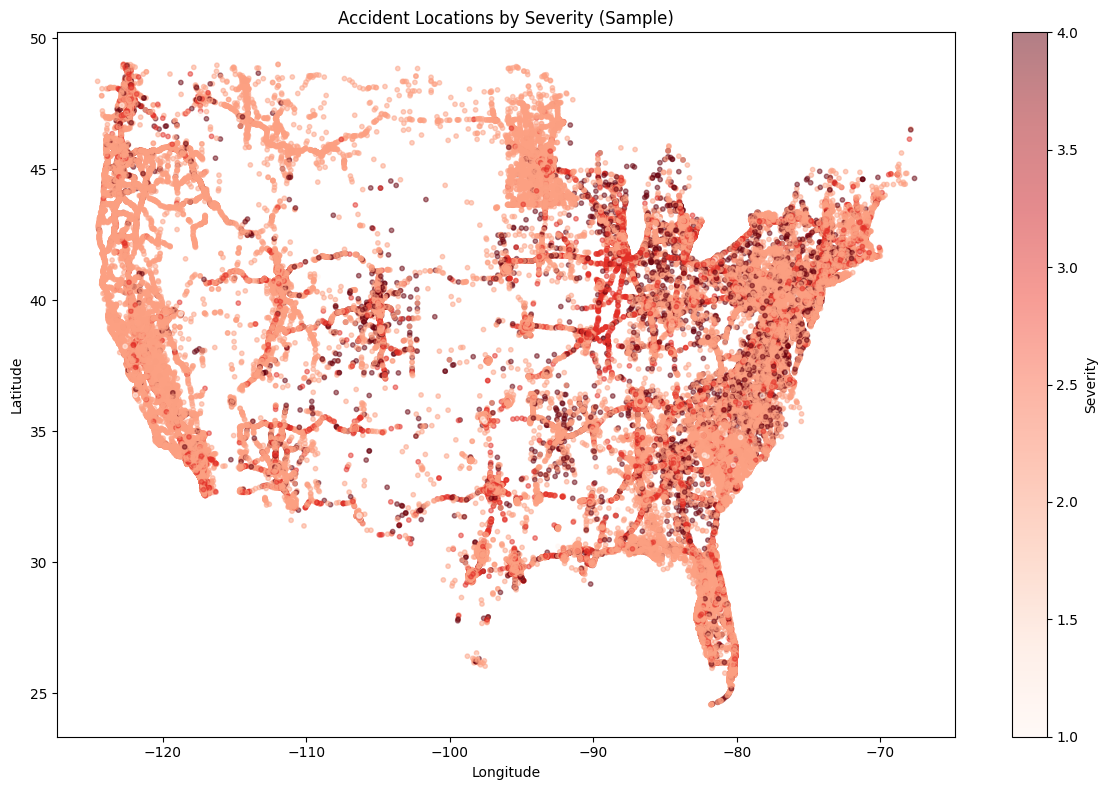

In [190]:
# Geospatial Insights
print("Geospatial Distribution")
sample_df = df.sample(350000, random_state=42) #Limiting the dataset
plt.figure(figsize=(12, 8))
plt.scatter(sample_df['Start_Lng'], sample_df['Start_Lat'], c=sample_df['Severity'], cmap='Reds', alpha=0.5, s=10)
plt.colorbar(label='Severity')
plt.title('Accident Locations by Severity (Sample)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()